In [54]:
# Basic Import
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import os
from datetime import datetime
import time

# Modelling
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import pickle
import json

In [55]:
match = pd.read_csv('matches.csv')
delivery = pd.read_csv('deliveries.csv', low_memory=False)

In [56]:
match.head()

,match_id,season,date,city,venue,team1,team2,toss_winner,toss_decision,player_of_match,...,event,match_number,umpire1,umpire2,reserve_umpire,tv_umpire,match_referee,eliminator,method,date_1
0,335982,2007/08,2008-04-18,Bangalore,M Chinnaswamy Stadium,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,BB McCullum,...,Indian Premier League,1.0,Asad Rauf,RE Koertzen,VN Kulkarni,AM Saheba,J Srinath,NaN,NaN,NaN
1,335983,2007/08,2008-04-19,Chandigarh,"Punjab Cricket Association Stadium, Mohali",Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,MEK Hussey,...,Indian Premier League,2.0,MR Benson,SL Shastri,MSS Ranawat,RB Tiffin,S Venkataraghavan,NaN,NaN,NaN
2,335984,2007/08,2008-04-19,Delhi,Feroz Shah Kotla,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,MF Maharoof,...,Indian Premier League,3.0,Aleem Dar,GA Pratapkumar,NaN,IL Howell,GR Viswanath,NaN,NaN,NaN
3,335985,2007/08,2008-04-20,Mumbai,Wankhede Stadium,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,MV Boucher,...,Indian Premier League,5.0,SJ Davis,DJ Harper,SN Bandekar,AV Jayaprakash,J Srinath,NaN,NaN,NaN
4,335986,2007/08,2008-04-20,Kolkata,Eden Gardens,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,DJ Hussey,...,Indian Premier League,4.0,BF Bowden,K Hariharan,F Gomes,Asad Rauf,FM Engineer,NaN,NaN,NaN


In [57]:
match.shape


(950, 27)

In [58]:
delivery.head()


,match_id,season,start_date,venue,innings,ball,batting_team,bowling_team,striker,non_striker,...,extras,wides,noballs,byes,legbyes,penalty,wicket_type,player_dismissed,other_wicket_type,other_player_dismissed
0,335982,2007/08,2008-04-18,M Chinnaswamy Stadium,1,0.1,Kolkata Knight Riders,Royal Challengers Bangalore,SC Ganguly,BB McCullum,...,1,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
1,335982,2007/08,2008-04-18,M Chinnaswamy Stadium,1,0.2,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,SC Ganguly,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,335982,2007/08,2008-04-18,M Chinnaswamy Stadium,1,0.3,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,SC Ganguly,...,1,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,335982,2007/08,2008-04-18,M Chinnaswamy Stadium,1,0.4,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,SC Ganguly,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,335982,2007/08,2008-04-18,M Chinnaswamy Stadium,1,0.5,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,SC Ganguly,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [59]:
delivery.shape


(225954, 22)

In [60]:
print(delivery.isna().sum())




match_id                       0
season                         0
start_date                     0
venue                          0
innings                        0
ball                           0
batting_team                   0
bowling_team                   0
striker                        0
non_striker                    0
bowler                         0
runs_off_bat                   0
extras                         0
wides                     218928
noballs                   225036
byes                      225371
legbyes                   222423
penalty                   225952
wicket_type               214803
player_dismissed          214803
other_wicket_type         225954
other_player_dismissed    225954
dtype: int64


In [61]:
print(match.isna().sum())

match_id             0
season               0
date                 0
city                51
venue                0
team1                0
team2                0
toss_winner          0
toss_decision        0
player_of_match      4
winner              18
winner_wickets       0
winner_runs          0
outcome            932
result_type          0
results              0
gender               0
event                0
match_number        58
umpire1              0
umpire2              0
reserve_umpire      24
tv_umpire            3
match_referee        0
eliminator         936
method             931
date_1             948
dtype: int64


In [62]:
delivery.nunique()

match_id                  950
season                     15
start_date                706
venue                      49
innings                     6
ball                      180
batting_team               18
bowling_team               18
striker                   605
non_striker               595
bowler                    473
runs_off_bat                7
extras                      7
wides                       5
noballs                     4
byes                        4
legbyes                     5
penalty                     1
wicket_type                10
player_dismissed          573
other_wicket_type           0
other_player_dismissed      0
dtype: int64

In [63]:
# Define numerical & categorical columns
numeric_columns = [column for column in delivery.columns if delivery[column].dtype != 'O']
categorical_columns = [column for column in delivery.columns if delivery[column].dtype == 'O']

# print columns
print('We have {} numerical columns(features) : {}'.format(len(numeric_columns), numeric_columns))
print('\nWe have {} categorical columns(features) : {}'.format(len(categorical_columns), categorical_columns))

We have 12 numerical columns(features) : ['match_id', 'innings', 'ball', 'runs_off_bat', 'extras', 'wides', 'noballs', 'byes', 'legbyes', 'penalty', 'other_wicket_type', 'other_player_dismissed']

We have 10 categorical columns(features) : ['season', 'start_date', 'venue', 'batting_team', 'bowling_team', 'striker', 'non_striker', 'bowler', 'wicket_type', 'player_dismissed']


In [64]:
# for feature in df.columns :
#     if df[feature].dtype == 'O':
#         print('Categories in {} variable : {}'.format(feature,df[feature].unique()))
print("Batting Team Name: {}".format(delivery['batting_team'].nunique()))
print(delivery['batting_team'].unique())
print("\nBowling Team Name: {}".format(delivery['bowling_team'].nunique()))
print(delivery['bowling_team'].unique())

Batting Team Name: 18
['Kolkata Knight Riders' 'Royal Challengers Bangalore'
 'Chennai Super Kings' 'Kings XI Punjab' 'Rajasthan Royals'
 'Delhi Daredevils' 'Deccan Chargers' 'Mumbai Indians'
 'Kochi Tuskers Kerala' 'Pune Warriors' 'Sunrisers Hyderabad'
 'Rising Pune Supergiants' 'Gujarat Lions' 'Rising Pune Supergiant'
 'Delhi Capitals' 'Punjab Kings' 'Lucknow Super Giants' 'Gujarat Titans']

Bowling Team Name: 18
['Royal Challengers Bangalore' 'Kolkata Knight Riders' 'Kings XI Punjab'
 'Chennai Super Kings' 'Delhi Daredevils' 'Rajasthan Royals'
 'Deccan Chargers' 'Mumbai Indians' 'Kochi Tuskers Kerala' 'Pune Warriors'
 'Sunrisers Hyderabad' 'Rising Pune Supergiants' 'Gujarat Lions'
 'Rising Pune Supergiant' 'Delhi Capitals' 'Punjab Kings' 'Gujarat Titans'
 'Lucknow Super Giants']


In [65]:
# define a dictionary to map the values to be replaced with their corresponding replacements
replace_dict = {'Delhi Daredevils': 'Delhi Capitals','Deccan Chargers':'Sunrisers Hyderabad','Pune Warriors':'Rising Pune Supergiants','Rising Pune Supergiant':'Rising Pune Supergiants','Gujarat Lions':'Gujarat Titans','Kings XI Punjab':'Punjab Kings'}
## Match Dataset
delivery['batting_team'].replace(replace_dict,inplace=True)
delivery['bowling_team'].replace(replace_dict,inplace=True)
## Match info
match['team1'].replace(replace_dict,inplace=True)
match['team2'].replace(replace_dict,inplace=True)
match['toss_winner'].replace(replace_dict,inplace=True)
match['winner'].replace(replace_dict,inplace=True)

In [66]:
# Define the mapping dictionary
short_name = {'Kolkata Knight Riders': 'KKR',
              'Royal Challengers Bangalore':'RCB',
              'Chennai Super Kings':'CSK',
              'Punjab Kings':'PBKS',
              'Rajasthan Royals':'RR',
              'Delhi Capitals':'DC',
              'Sunrisers Hyderabad':'SRH',
              'Mumbai Indians':'MI',
              'Kochi Tuskers Kerala':'KTK',
              'Rising Pune Supergiants':'RPSG',
              'Gujarat Titans':'GT',
              'Lucknow Super Giants':'LSG'}
# Map the values of batting_team column to shortnames
delivery['batting_team_short_name'] = delivery['batting_team'].map(short_name)

# Map the values of bowling_team column to shortnames
delivery['bowling_team_short_name'] = delivery['bowling_team'].map(short_name)

In [67]:
## Match Dataset
# Rename column 'venue' to 'Stadium'
delivery = delivery.rename(columns={'venue': 'stadium'})
# Rename column 'ball' to 'over'
delivery = delivery.rename(columns={'ball': 'over'})

## Match info
# Rename column 'venue' to 'Stadium'
match = match.rename(columns={'venue': 'stadium'})

In [68]:
print("stadium: {}".format(delivery['stadium'].nunique()))
print(delivery['stadium'].unique())

stadium: 49
['M Chinnaswamy Stadium' 'Punjab Cricket Association Stadium, Mohali'
 'Feroz Shah Kotla' 'Eden Gardens' 'Wankhede Stadium'
 'Sawai Mansingh Stadium' 'Rajiv Gandhi International Stadium, Uppal'
 'MA Chidambaram Stadium, Chepauk' 'Dr DY Patil Sports Academy' 'Newlands'
 "St George's Park" 'Kingsmead' 'SuperSport Park' 'Buffalo Park'
 'New Wanderers Stadium' 'De Beers Diamond Oval' 'OUTsurance Oval'
 'Brabourne Stadium' 'Sardar Patel Stadium, Motera' 'Barabati Stadium'
 'Brabourne Stadium, Mumbai'
 'Vidarbha Cricket Association Stadium, Jamtha'
 'Himachal Pradesh Cricket Association Stadium' 'Nehru Stadium'
 'Holkar Cricket Stadium'
 'Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium'
 'Subrata Roy Sahara Stadium' 'Maharashtra Cricket Association Stadium'
 'Shaheed Veer Narayan Singh International Stadium'
 'JSCA International Stadium Complex' 'Sheikh Zayed Stadium'
 'Sharjah Cricket Stadium' 'Dubai International Cricket Stadium'
 'Punjab Cricket Association IS Bindra Stadi

In [69]:
venue_stadium = {'M Chinnaswamy Stadium':'Bengaluru',
         'Punjab Cricket Association Stadium, Mohali':'Mohali',
         'Feroz Shah Kotla':'Delhi',
         'Eden Gardens': 'Kolkata',
         'Wankhede Stadium' : 'Mumbai',
         'Sawai Mansingh Stadium': 'Jaipur',
         'Rajiv Gandhi International Stadium, Uppal':'Hyderabad',
         'MA Chidambaram Stadium, Chepauk': 'Chennai',
         'Dr DY Patil Sports Academy' : 'Mumbai',
         'Newlands': 'Cape Town, South Africa',
         "St George's Park" : 'Gqeberha, South Africa',
        'Kingsmead' : 'Durban, KwaZulu-Natal, South Africa',
        'SuperSport Park' : 'Centurion, South Africa',
         'Buffalo Park': 'East London, Eastern Cape, South Africa',
          'New Wanderers Stadium':'Johannesburg, South Africa',
         'De Beers Diamond Oval' : 'Kimberley, South Africa',
         'OUTsurance Oval': 'Bloemfontein, South Africa',
         'Brabourne Stadium':'Mumbai',
         'Brabourne Stadium, Mumbai':'Mumbai',
         'Sardar Patel Stadium, Motera':'Ahmedabad',
         'Barabati Stadium':'Cuttack',
         'Vidarbha Cricket Association Stadium, Jamtha':'Jamtha',
         'Himachal Pradesh Cricket Association Stadium' :'Dharamshala',
         'Nehru Stadium':'Delhi',
         'Holkar Cricket Stadium': 'Indore',
         'Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium' :'Visakhapatnam',
         'Subrata Roy Sahara Stadium' : 'Pune',
         'Maharashtra Cricket Association Stadium': 'Pune',
         'Maharashtra Cricket Association Stadium' : 'Pune',
         'Shaheed Veer Narayan Singh International Stadium': 'Raipur',
         'JSCA International Stadium Complex': 'Ranchi',
         'Sheikh Zayed Stadium' :'Abu Dhabi, UAE',
         'Sharjah Cricket Stadium' :'Sharjah, UAE',
         'Dubai International Cricket Stadium' : 'Dubai, UAE',
         'Punjab Cricket Association IS Bindra Stadium, Mohali' : 'Mohali',
         'Saurashtra Cricket Association Stadium': 'Rajkot',
         'Green Park' :'Kanpur',
         'M.Chinnaswamy Stadium' : 'Bengaluru',
         'MA Chidambaram Stadium': 'Chennai',
         'Arun Jaitley Stadium' : 'Delhi',
         'Rajiv Gandhi International Stadium':'Hyderabad',
         'Punjab Cricket Association IS Bindra Stadium': 'Mohali',
         'MA Chidambaram Stadium, Chepauk, Chennai': 'Chennai',
         'Wankhede Stadium, Mumbai': 'Mumbai',
         'Narendra Modi Stadium, Ahmedabad':'Ahmedabad',
         'Arun Jaitley Stadium, Delhi':'Delhi', 
         'Zayed Cricket Stadium, Abu Dhabi' : 'Abu Dhabi, UAE',
         'Dr DY Patil Sports Academy, Mumbai' : 'Mumbai',
         'Maharashtra Cricket Association Stadium, Pune' : 'Pune',
         'Eden Gardens, Kolkata': 'Kolkata'
        }
## Match Datset
# Map the values of stadium column to venue_stadium
delivery['venue'] = delivery['stadium'].map(venue_stadium)

## Match info
# Map the values of stadium column to venue_stadium
match['venue'] = match['stadium'].map(venue_stadium)

In [70]:
actual_name_stadium = {'Brabourne Stadium': 'Brabourne Stadium, Mumbai',
                'M Chinnaswamy Stadium' : 'Mangalam Chinnaswamy Stadium',
                'Punjab Cricket Association Stadium, Mohali':'Inderjit Singh Bindra Stadium',
                'Feroz Shah Kotla':'Arun Jaitley Cricket Stadium',
                'Eden Gardens' :'Eden Gardens',
                'Wankhede Stadium' : 'Sheshrao Krushnarao Wankhede Stadium',
                'Sawai Mansingh Stadium' :'Sawai Mansingh Stadium',
                'Rajiv Gandhi International Stadium, Uppal' :'Rajiv Gandhi International Stadium',
                'MA Chidambaram Stadium, Chepauk': 'M.A. Chidambaram stadium',
                'Dr DY Patil Sports Academy' : 'Dr. D.Y. Patil Sports Academy',
                'Newlands' :'Newlands',
                "St George's Park": "St George's Park",
                'Kingsmead':'Kingsmead',
                'SuperSport Park':'SuperSport Park',
                'Buffalo Park':'Buffalo Park',
                'New Wanderers Stadium':'New Wanderers Stadium',
                'De Beers Diamond Oval':'De Beers Diamond Oval',
                'Sardar Patel Stadium, Motera':'Narendra Modi Stadium',
                'Barabati Stadium':'Barabati Stadium',
                'Vidarbha Cricket Association Stadium, Jamtha': 'Vidarbha Cricket Association Jamtha Stadium',
                'Himachal Pradesh Cricket Association Stadium':'Himachal Pradesh Cricket Association Stadium',
                'Nehru Stadium':'Jawaharlal Nehru University Stadium',
                'Holkar Cricket Stadium':'Holkar Cricket Stadium',
                'Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium' : 'Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium',
                'Subrata Roy Sahara Stadium' : 'Maharashtra Cricket Association Stadium',
                'Maharashtra Cricket Association Stadium' :'Maharashtra Cricket Association Stadium',
                'Maharashtra Cricket Association Stadium' :'Maharashtra Cricket Association Stadium',
                'Shaheed Veer Narayan Singh International Stadium': 'Shaheed Veer Narayan Singh International Cricket Stadium',
                'JSCA International Stadium Complex' : 'Jharkhand State Cricket Association International Cricket Stadium',
                'Sheikh Zayed Stadium':'Sheikh Zayed Cricket Stadium',
                'Sharjah Cricket Stadium' : 'Sharjah Cricket Stadium',
                'Dubai International Cricket Stadium' : 'Dubai International Cricket Stadium',
                'Punjab Cricket Association IS Bindra Stadium, Mohali': 'Inderjit Singh Bindra Stadium',
                'Saurashtra Cricket Association Stadium': 'Khandheri Cricket Stadium',
                'Green Park' : 'Green Park Cricket Stadium',
                'M.Chinnaswamy Stadium' : 'Mangalam Chinnaswamy Stadium',
                'MA Chidambaram Stadium': 'M.A. Chidambaram stadium',
                'Arun Jaitley Stadium': 'Arun Jaitley Cricket Stadium',
                'Rajiv Gandhi International Stadium':'Rajiv Gandhi International Stadium',
                'Punjab Cricket Association IS Bindra Stadium': 'Inderjit Singh Bindra Stadium',
                'MA Chidambaram Stadium, Chepauk, Chennai': 'M.A. Chidambaram stadium',
                'Wankhede Stadium, Mumbai': 'Sheshrao Krushnarao Wankhede Stadium',
                'Narendra Modi Stadium, Ahmedabad':'Narendra Modi Stadium',
                'Arun Jaitley Stadium, Delhi' : 'Arun Jaitley Cricket Stadium',
                'Zayed Cricket Stadium, Abu Dhabi' : 'Sheikh Zayed Cricket Stadium',
                'Dr DY Patil Sports Academy, Mumbai' : 'Dr. D.Y. Patil Sports Academy',
                'Maharashtra Cricket Association Stadium, Pune' :'Maharashtra Cricket Association Stadium',
                'Eden Gardens, Kolkata': 'Eden Gardens',
                'OUTsurance Oval': 'Mangaung Oval',
                'Brabourne Stadium, Mumbai':'Brabourne Stadium, Mumbai'
               }
## Match Dataset
# Map the values of stadium column to actual_name_stadium
delivery['actual_name_stadium'] = delivery['stadium'].map(actual_name_stadium)

## Match info
# Map the values of stadium column to actual_name_stadium
match['actual_name_stadium'] = match['stadium'].map(actual_name_stadium)

In [71]:
# Converting the column 'date' from string into datetime object
delivery['start_date'] = delivery['start_date'].apply(lambda x: datetime.strptime(x, '%Y-%m-%d'))

## Match info
# Converting the column 'date' from string into datetime object
match['date'] = match['date'].apply(lambda x: datetime.strptime(x, '%Y-%m-%d'))

In [72]:
delivery['total_run'] = delivery['runs_off_bat'] +delivery['extras']

In [73]:
delivery['final_total_runs'] = 0

# group by match_id and innings, and sum the total runs
total_runs = delivery.groupby(['match_id', 'innings'])['total_run'].sum().reset_index()

# loop through each row in total_runs
for i, row in total_runs.iterrows():
    # find the corresponding rows in the main dataframe and update the final_total_runs column
    delivery.loc[(delivery['match_id'] == row['match_id']) & (delivery['innings'] == row['innings']), 'final_total_runs'] = row['total_run']

In [74]:
# Create a new column "is_wicket" based on "wicket_type"
delivery['is_wicket'] = delivery['wicket_type'].apply(lambda x: 1 if pd.notnull(x) and x != '' else 0)

# df[['wicket_type', 'is_wicket']].head()
# df[df['wicket_type'] != 'caught'][['wicket_type', 'is_wicket']].head()
# df[df['wicket_type'].notna()][['wicket_type', 'is_wicket']].head()

In [75]:
# Let's group the dataframe by match_id and innings
grouped = delivery.groupby(["match_id", "innings"])

# Let's calculate the cumulative sum of wickets, runs, and balls
delivery["wickets"] = grouped["is_wicket"].cumsum()
delivery["runs"] = grouped["total_run"].cumsum()
# df[['match_id','is_wicket','wickets','total_run', 'runs','over']].head(15)

In [76]:
delivery[['match_id','stadium','venue', 'actual_name_stadium']].sample(20)

,match_id,stadium,venue,actual_name_stadium
166049,1136593,Eden Gardens,Kolkata,Eden Gardens
155400,1178396,Sawai Mansingh Stadium,Jaipur,Sawai Mansingh Stadium
38183,419151,"Vidarbha Cricket Association Stadium, Jamtha",Jamtha,Vidarbha Cricket Association Jamtha Stadium
100880,733983,Wankhede Stadium,Mumbai,Sheshrao Krushnarao Wankhede Stadium
48326,501227,Feroz Shah Kotla,Delhi,Arun Jaitley Cricket Stadium
84003,598027,M Chinnaswamy Stadium,Bengaluru,Mangalam Chinnaswamy Stadium
79606,598010,Feroz Shah Kotla,Delhi,Arun Jaitley Cricket Stadium
11497,336002,"Rajiv Gandhi International Stadium, Uppal",Hyderabad,Rajiv Gandhi International Stadium
64389,548331,"Punjab Cricket Association Stadium, Mohali",Mohali,Inderjit Singh Bindra Stadium
220050,1304096,"Brabourne Stadium, Mumbai",Mumbai,"Brabourne Stadium, Mumbai"


In [77]:
print("Total No. of columns:", len(delivery.columns))
delivery.columns

Total No. of columns: 31


Index(['match_id', 'season', 'start_date', 'stadium', 'innings', 'over',
       'batting_team', 'bowling_team', 'striker', 'non_striker', 'bowler',
       'runs_off_bat', 'extras', 'wides', 'noballs', 'byes', 'legbyes',
       'penalty', 'wicket_type', 'player_dismissed', 'other_wicket_type',
       'other_player_dismissed', 'batting_team_short_name',
       'bowling_team_short_name', 'venue', 'actual_name_stadium', 'total_run',
       'final_total_runs', 'is_wicket', 'wickets', 'runs'],
      dtype='object')

In [78]:
print("Total No. of columns:", len(match.columns))
match.columns

Total No. of columns: 29


Index(['match_id', 'season', 'date', 'city', 'stadium', 'team1', 'team2',
       'toss_winner', 'toss_decision', 'player_of_match', 'winner',
       'winner_wickets', 'winner_runs', 'outcome', 'result_type', 'results',
       'gender', 'event', 'match_number', 'umpire1', 'umpire2',
       'reserve_umpire', 'tv_umpire', 'match_referee', 'eliminator', 'method',
       'date_1', 'venue', 'actual_name_stadium'],
      dtype='object')

In [79]:
delivery = delivery[['match_id', 'season', 'start_date', 'stadium', 'actual_name_stadium', 'venue', 'innings', 'over',
         'batting_team', 'batting_team_short_name', 'bowling_team', 'bowling_team_short_name', 'striker', 'non_striker', 'bowler',
         'runs_off_bat', 'extras', 'total_run', 'final_total_runs', 'runs', 'wides', 'noballs', 'byes', 'legbyes',
         'penalty', 'wicket_type', 'is_wicket', 'wickets', 'player_dismissed', 'other_wicket_type',
         'other_player_dismissed']]
print("-------- Match Dataset --------")
print("Total No. of columns:", len(delivery.columns))
delivery.columns

-------- Match Dataset --------
Total No. of columns: 31


Index(['match_id', 'season', 'start_date', 'stadium', 'actual_name_stadium',
       'venue', 'innings', 'over', 'batting_team', 'batting_team_short_name',
       'bowling_team', 'bowling_team_short_name', 'striker', 'non_striker',
       'bowler', 'runs_off_bat', 'extras', 'total_run', 'final_total_runs',
       'runs', 'wides', 'noballs', 'byes', 'legbyes', 'penalty', 'wicket_type',
       'is_wicket', 'wickets', 'player_dismissed', 'other_wicket_type',
       'other_player_dismissed'],
      dtype='object')

In [80]:
match = match[['match_id', 'season', 'date', 'city', 'stadium','actual_name_stadium','venue', 'team1', 'team2',
       'toss_winner', 'toss_decision', 'player_of_match', 'winner',
       'winner_wickets', 'winner_runs', 'outcome', 'result_type', 'results',
       'gender', 'event', 'match_number', 'umpire1', 'umpire2',
       'reserve_umpire', 'tv_umpire', 'match_referee', 'eliminator', 'method',
       'date_1']]
print("-------- Match info --------")
print("Total No. of columns:", len(match.columns))
match.columns

-------- Match info --------
Total No. of columns: 29


Index(['match_id', 'season', 'date', 'city', 'stadium', 'actual_name_stadium',
       'venue', 'team1', 'team2', 'toss_winner', 'toss_decision',
       'player_of_match', 'winner', 'winner_wickets', 'winner_runs', 'outcome',
       'result_type', 'results', 'gender', 'event', 'match_number', 'umpire1',
       'umpire2', 'reserve_umpire', 'tv_umpire', 'match_referee', 'eliminator',
       'method', 'date_1'],
      dtype='object')

In [81]:
delivery.to_csv('match_data.csv', index=False)
match.to_csv('match_info.csv', index=False)

In [82]:
# Removing unwanted columns and rearranging columns
columns_to_remove = ['match_id', 'season', 'striker', 'non_striker', 'bowler',
                     'runs_off_bat', 'extras', 'wides', 'noballs', 'byes', 'legbyes',
                     'penalty', 'wicket_type', 'player_dismissed', 'other_wicket_type',
                     'other_player_dismissed', 'batting_team_short_name','start_date',
                     'bowling_team_short_name', 'total_run', 'is_wicket', 'stadium', 'actual_name_stadium']

delivery1 = delivery.drop(columns=columns_to_remove)[["batting_team", "bowling_team", "venue",
                                          "innings", "over", "runs", "wickets", "final_total_runs"]]
delivery1.head()

,batting_team,bowling_team,venue,innings,over,runs,wickets,final_total_runs
0,Kolkata Knight Riders,Royal Challengers Bangalore,Bengaluru,1,0.1,1,0,222
1,Kolkata Knight Riders,Royal Challengers Bangalore,Bengaluru,1,0.2,1,0,222
2,Kolkata Knight Riders,Royal Challengers Bangalore,Bengaluru,1,0.3,2,0,222
3,Kolkata Knight Riders,Royal Challengers Bangalore,Bengaluru,1,0.4,2,0,222
4,Kolkata Knight Riders,Royal Challengers Bangalore,Bengaluru,1,0.5,2,0,222


In [83]:
encoded_teams = {k:v for v, k in enumerate(delivery1['batting_team'].append(delivery1['bowling_team']).unique(), 0)}
encoded_teams

C:\Users\pande\AppData\Local\Temp\ipykernel_21832\2126125794.py:1: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  encoded_teams = {k:v for v, k in enumerate(delivery1['batting_team'].append(delivery1['bowling_team']).unique(), 0)}


{'Kolkata Knight Riders': 0,
 'Royal Challengers Bangalore': 1,
 'Chennai Super Kings': 2,
 'Punjab Kings': 3,
 'Rajasthan Royals': 4,
 'Delhi Capitals': 5,
 'Sunrisers Hyderabad': 6,
 'Mumbai Indians': 7,
 'Kochi Tuskers Kerala': 8,
 'Rising Pune Supergiants': 9,
 'Gujarat Titans': 10,
 'Lucknow Super Giants': 11}

In [84]:
delivery1['batting_team'] = delivery1['batting_team'].map(encoded_teams)
delivery1['bowling_team'] = delivery1['bowling_team'].map(encoded_teams)
delivery1.sample(30)

,batting_team,bowling_team,venue,innings,over,runs,wickets,final_total_runs
210891,6,11,Mumbai,2,8.4,76,2,157
112880,6,1,Bengaluru,2,6.2,66,0,172
111180,0,7,Kolkata,2,11.4,97,1,170
177271,4,5,Delhi,1,19.2,107,8,115
141193,1,10,Rajkot,1,5.5,44,0,213
92058,9,0,Ranchi,1,7.6,50,1,170
101777,3,1,Bengaluru,1,8.2,90,2,198
115483,0,2,Kolkata,2,1.3,7,0,169
32483,0,3,Mohali,1,8.3,58,2,183
135489,5,1,Raipur,1,16.4,108,7,138


In [85]:
X =delivery1.drop(columns=['final_total_runs'],axis=1)
print("Data Shape is :",X.shape)
X.head()

Data Shape is : (225954, 7)


,batting_team,bowling_team,venue,innings,over,runs,wickets
0,0,1,Bengaluru,1,0.1,1,0
1,0,1,Bengaluru,1,0.2,1,0
2,0,1,Bengaluru,1,0.3,2,0
3,0,1,Bengaluru,1,0.4,2,0
4,0,1,Bengaluru,1,0.5,2,0


In [86]:
Y = delivery1['final_total_runs']
Y.head()

0    222
1    222
2    222
3    222
4    222
Name: final_total_runs, dtype: int64

In [87]:
# Get the column names of numerical and categorical features
num_features = X.select_dtypes(exclude="object").columns
cat_features = X.select_dtypes(include="object").columns

# Instantiate OneHotEncoder
encoder = OneHotEncoder()

# Use fit_transform() to encode the specified columns
encoded_features = encoder.fit_transform(X[cat_features])

# The encoded_features will be in a sparse matrix format, you can convert it to a dense array using toarray()
# If you want to append it to the original dataframe, you can convert it to a dataframe using pd.DataFrame()
encoded_features_df = pd.DataFrame(encoded_features.toarray(), columns=encoder.get_feature_names_out(cat_features))

# Remove the "venue_" prefix from column names in the encoded features dataframe
encoded_features_df.columns = [col.split("venue_")[1] for col in encoded_features_df.columns]

# Concatenate the encoded features dataframe with the original dataframe
X = pd.concat([X.drop(cat_features, axis=1), encoded_features_df], axis=1)

# Display the encoded dataframe
X.head()

,batting_team,bowling_team,innings,over,runs,wickets,"Abu Dhabi, UAE",Ahmedabad,Bengaluru,"Bloemfontein, South Africa",...,"Kimberley, South Africa",Kolkata,Mohali,Mumbai,Pune,Raipur,Rajkot,Ranchi,"Sharjah, UAE",Visakhapatnam
0,0,1,1,0.1,1,0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0,1,1,0.2,1,0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0,1,1,0.3,2,0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0,1,1,0.4,2,0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0,1,1,0.5,2,0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [88]:
X.columns

Index(['batting_team', 'bowling_team', 'innings', 'over', 'runs', 'wickets',
       'Abu Dhabi, UAE', 'Ahmedabad', 'Bengaluru',
       'Bloemfontein, South Africa', 'Cape Town, South Africa',
       'Centurion, South Africa', 'Chennai', 'Cuttack', 'Delhi', 'Dharamshala',
       'Dubai, UAE', 'Durban, KwaZulu-Natal, South Africa',
       'East London, Eastern Cape, South Africa', 'Gqeberha, South Africa',
       'Hyderabad', 'Indore', 'Jaipur', 'Jamtha', 'Johannesburg, South Africa',
       'Kanpur', 'Kimberley, South Africa', 'Kolkata', 'Mohali', 'Mumbai',
       'Pune', 'Raipur', 'Rajkot', 'Ranchi', 'Sharjah, UAE', 'Visakhapatnam'],
      dtype='object')

In [89]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2,random_state=42)
X_train.shape, X_test.shape

((180763, 36), (45191, 36))

In [90]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [91]:
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_square = r2_score(true, predicted)
    return mae,mse,rmse,r2_square

In [92]:
algos = {
    "Linear Regression": {
        "model": LinearRegression(),
        "params": {}
    },
    "Ridge": {
        "model": Ridge(),
        "params": {
            "alpha":np.arange(0.1, 1, 0.01)
        }
    },
    "Lasso": {
        "model": Lasso(),
        "params": {
            "alpha": np.arange(0.1, 1, 0.01)
        }
    }
}

In [93]:
start_time = time.time()
train_model_error = []
test_model_error = []
best_model_details = []
final_model = {}
# Train and evaluate models
for model_name, values in algos.items():
    
    grid_search = GridSearchCV(values["model"], values["params"], scoring='neg_mean_squared_error', cv=5)
#     codegrid_search = RandomizedSearchCV(values["model"], values["params"], cv=5, n_iter=15, n_jobs=-1, verbose=2, random_state=4)
    grid_search.fit(X_train, Y_train)
    best_score = grid_search.best_score_
    best_params = grid_search.best_params_
    
    best_model_details.append({"Model Name": model_name, "Best Score": best_score, "Best Parameters": best_params})
    # Fit model with best hyperparameters
    best_model = values["model"].set_params(**best_params)
    best_model.fit(X_train, Y_train)
    final_model[model_name] = best_model
    # Make predictions
    Y_train_pred = best_model.predict(X_train)
    Y_test_pred = best_model.predict(X_test)
    
    # Evaluate Train and Test dataset
    model_train_mae , model_train_mse, model_train_rmse, model_train_r2 = evaluate_model(Y_train, Y_train_pred)
    model_test_mae , model_test_mse, model_test_rmse, model_test_r2 = evaluate_model(Y_test, Y_test_pred)
    
    train_model_error.append({"Model Name": model_name, "Mean Absolute Error": model_train_mae, "Mean Squared Error": model_train_mse, "Root Mean Squared Error": model_train_rmse,"r2 score":model_train_r2})
    test_model_error.append({"Model Name": model_name, "Mean Absolute Error": model_test_mae, "Mean Squared Error": model_test_mse, "Root Mean Squared Error": model_test_rmse,"r2 score":model_test_r2})
    print("Model : "+ model_name)
    print('Best Model Details')
    print('Best score:', best_score)
    print('Best params:', best_params)
    print('----------------------------------')
    
    
    print('Model performance for Training set')
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- R2 Score: {:.4f}".format(model_train_r2))
    print('----------------------------------')
    
    print('Model performance for Test set')
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- R2 Score: {:.4f}".format(model_test_r2))
    
    print('='*35)
    print('\n')
    
print("--------------------------------------------------------")
print(f"it takes {(time.time() - start_time) / 60} minutes")
print("--------------------------------------------------------")

Model : Linear Regression
Best Model Details
Best score: -507.4788454034048
Best params: {}
----------------------------------
Model performance for Training set
- Root Mean Squared Error: 22.5224
- Mean Absolute Error: 16.6505
- R2 Score: 0.4322
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 22.4982
- Mean Absolute Error: 16.5750
- R2 Score: 0.4357


Model : Ridge
Best Model Details
Best score: -507.4784792257219
Best params: {'alpha': 0.9899999999999995}
----------------------------------
Model performance for Training set
- Root Mean Squared Error: 22.5224
- Mean Absolute Error: 16.6505
- R2 Score: 0.4322
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 22.4982
- Mean Absolute Error: 16.5750
- R2 Score: 0.4357


Model : Lasso
Best Model Details
Best score: -508.0736842239371
Best params: {'alpha': 0.1}
----------------------------------
Model performance for Training set
- Root Mean Squared Err

In [94]:
pd.set_option('display.max_colwidth', None)
print("-------- Best Model Details --------")
pd.DataFrame(best_model_details)

-------- Best Model Details --------


,Model Name,Best Score,Best Parameters
0,Linear Regression,-507.478845,{}
1,Ridge,-507.478479,{'alpha': 0.9899999999999995}
2,Lasso,-508.073684,{'alpha': 0.1}


In [95]:
train_model_error = pd.DataFrame(train_model_error)
print("-------- Training Data Error --------")
train_model_error

-------- Training Data Error --------


,Model Name,Mean Absolute Error,Mean Squared Error,Root Mean Squared Error,r2 score
0,Linear Regression,16.650511,507.258857,22.522408,0.432226
1,Ridge,16.650547,507.258859,22.522408,0.432226
2,Lasso,16.663476,507.866774,22.535900,0.431545


In [96]:
test_model_error = pd.DataFrame(test_model_error)
print("-------- Test Data Error --------")
test_model_error

-------- Test Data Error --------


,Model Name,Mean Absolute Error,Mean Squared Error,Root Mean Squared Error,r2 score
0,Linear Regression,16.574971,506.168227,22.498183,0.435678
1,Ridge,16.575002,506.168324,22.498185,0.435678
2,Lasso,16.595579,507.151828,22.520032,0.434582


In [97]:
# Compare train and test data errors for each model
train_model_error = pd.DataFrame(train_model_error)
test_model_error = pd.DataFrame(test_model_error)

# print("-------- Training Data Error --------")
# print(train_model_error)
# print("\n-------- Test Data Error --------")
# print(test_model_error)

# Choose the best-performing model based on evaluation metrics
best_model = None

# Find the model with the lowest MAE
best_mae = min(test_model_error['Mean Absolute Error'])
best_models_mae = test_model_error[test_model_error['Mean Absolute Error'] == best_mae]['Model Name'].values
best_model = ', '.join(best_models_mae)

# Find the model with the lowest MSE
best_mse = min(test_model_error['Mean Squared Error'])
best_models_mse = test_model_error[test_model_error['Mean Squared Error'] == best_mse]['Model Name'].values
best_model += ', ' + ', '.join([model for model in best_models_mse if model not in best_models_mae])

# Find the model with the lowest RMSE
best_rmse = min(test_model_error['Root Mean Squared Error'])
best_models_rmse = test_model_error[test_model_error['Root Mean Squared Error'] == best_rmse]['Model Name'].values
best_model += ', ' + ', '.join([model for model in best_models_rmse if model not in best_models_mae and model not in best_models_mse])

# Find the model with the highest R2 score
best_r2 = max(test_model_error['r2 score'])
best_models_r2 = test_model_error[test_model_error['r2 score'] == best_r2]['Model Name'].values
best_model += ', ' + ', '.join([model for model in best_models_r2 if model not in best_models_mae and model not in best_models_mse and model not in best_models_rmse])

print("\nBest Performing Model(s):", best_model.split(",")[0])


Best Performing Model(s): Linear Regression


In [98]:
# let's save gradient boost model and scaler in the form of pickle file
# encoded_team and feature columns as JSON file for prediction purpose which i use in web app 

save_model=best_model.split(",")[0]

with open("model.pickle", "wb") as f:
    pickle.dump(final_model[save_model], f)  
    
with open("scaler.pickle", "wb") as f:
    pickle.dump(scaler, f)
    
with open("encodedteams.json", "w") as f:
    json.dump(encoded_teams, f)
    
with open("columns.json", "w") as f:
    json.dump({"columns": list(X.columns)}, f)

In [99]:
scaler = None
model = None
encoded_teams = None
columns = None

with open("model.pickle", "rb") as f:
    model = pickle.load(f)
    
with open("scaler.pickle", "rb") as f:
    scaler = pickle.load(f)

with open("encodedteams.json", "r") as f:
    encoded_teams = json.load(f)

with open("columns.json", "r") as f:
    columns = np.array(json.load(f)["columns"])

In [100]:
# Define function for making predictions
def prediction(batting_team,bowling_team,innings,over,runs,wickets,venue):
    # Create an array to hold input features
    X_pred = np.zeros(columns.size)
    
    # Assign input values to corresponding array indices
    X_pred[0] = encoded_teams[batting_team]
    X_pred[1] = encoded_teams[bowling_team]
    X_pred[2] = innings
    X_pred[3] = over
    X_pred[4] = runs
    X_pred[5] = wickets
    
    venue_pos = np.where(venue == columns)[0][0]
    X_pred[venue_pos] = 1
    
        
    
    # Scale input features using the loaded scaler
    X_pred = scaler.transform([X_pred])
    
    # Make prediction using the loaded model
    prediction = model.predict(X_pred)
    
    # Return the prediction
    return prediction

# Call the prediction function with example input values
result = prediction("Kolkata Knight Riders", "Royal Challengers Bangalore", 1,5.1,20,0,"Bengaluru")
print(result)

[152.32299483]


D:\anaconda5\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


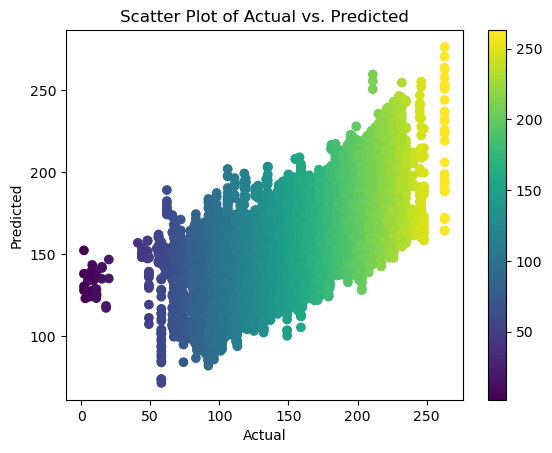

In [101]:
from matplotlib import cm
# Create the scatter plot
fig, ax = plt.subplots()
sc = ax.scatter(Y_test, Y_test_pred, c=Y_test, cmap=cm.viridis)
fig.colorbar(sc)

# Set the axis labels
ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')
ax.set_title('Scatter Plot of Actual vs. Predicted')

plt.show()

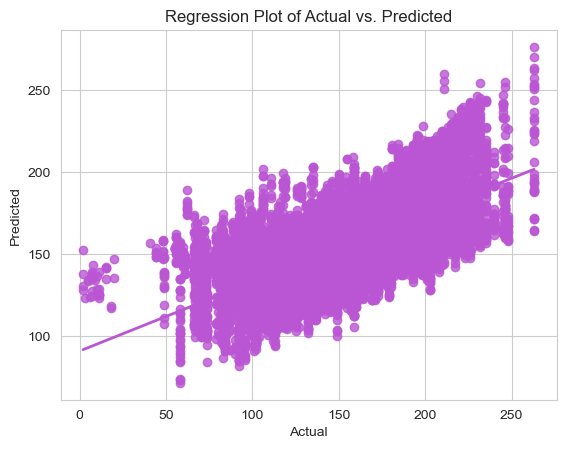

In [102]:
# Create the regression plot
sns.set_style('whitegrid')
sns.regplot(x=Y_test, y=Y_test_pred, ci=None, color='mediumorchid', line_kws={'lw':2})

# Set the axis labels and title
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Regression Plot of Actual vs. Predicted')

plt.show()

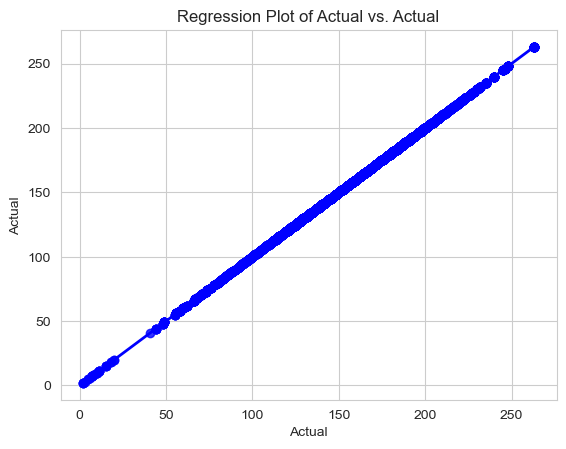

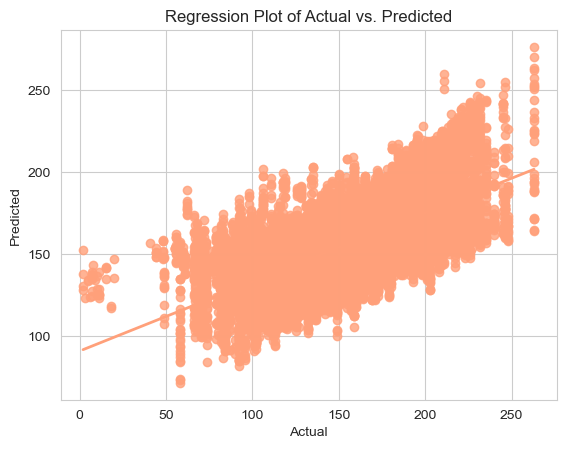

In [104]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create the regression plot for actual values in blue color
sns.set_style('whitegrid')
sns.regplot(x=Y_test, y=Y_test, ci=None, color='blue', line_kws={'lw':2})

# Set the axis labels and title for actual values plot
plt.xlabel('Actual')
plt.ylabel('Actual')
plt.title('Regression Plot of Actual vs. Actual')

plt.show()

# Create the regression plot for predicted values in light red color
sns.set_style('whitegrid')
sns.regplot(x=Y_test, y=Y_test_pred, ci=None, color='lightsalmon', line_kws={'lw':2})

# Set the axis labels and title for predicted values plot
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Regression Plot of Actual vs. Predicted')

plt.show()

In [105]:
pred_df=pd.DataFrame({'Actual Value':Y_test,'Predicted Value':Y_test_pred,'Difference':Y_test-Y_test_pred})
pred_df

,Actual Value,Predicted Value,Difference
177814,173,180.301387,-7.301387
3287,162,158.871139,3.128861
188612,85,134.372287,-49.372287
96212,193,168.282713,24.717287
30637,161,170.830526,-9.830526
...,...,...,...
33159,131,150.279840,-19.279840
191777,153,153.030316,-0.030316
104833,164,166.707103,-2.707103
87767,80,134.329447,-54.329447
